intro write stuff about the project the model etc

imports

In [16]:
import os
import pandas as pd
import pandas
import tensorflow
import sklearn
import numpy
import matplotlib
import librosa
import librosa.display
import seaborn as sns
from glob import glob
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])
import matplotlib.pyplot as plt
import numpy as np

In [17]:

# Paths
metadata_path = "UrbanSound8K/metadata/UrbanSound8K.csv"
audio_base_path = "UrbanSound8K/audio"

# Load Metadata
metadata = pd.read_csv(metadata_path)

data exploration

Sampling Rate: 22050 Hz
Audio Duration: 4.00 seconds
Audio Shape: (88200,)


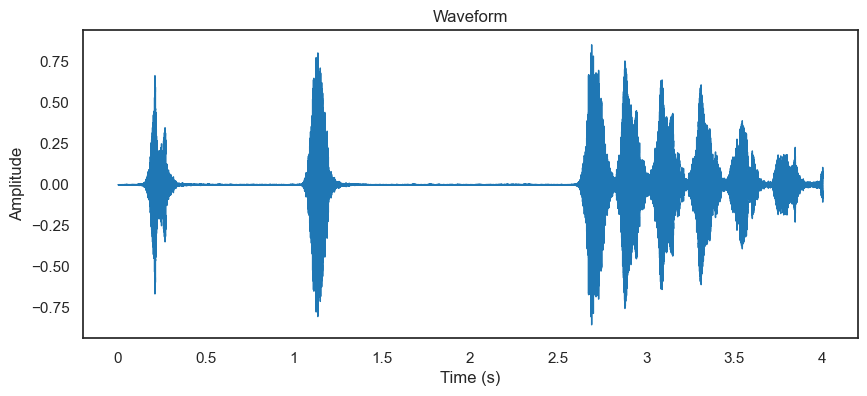

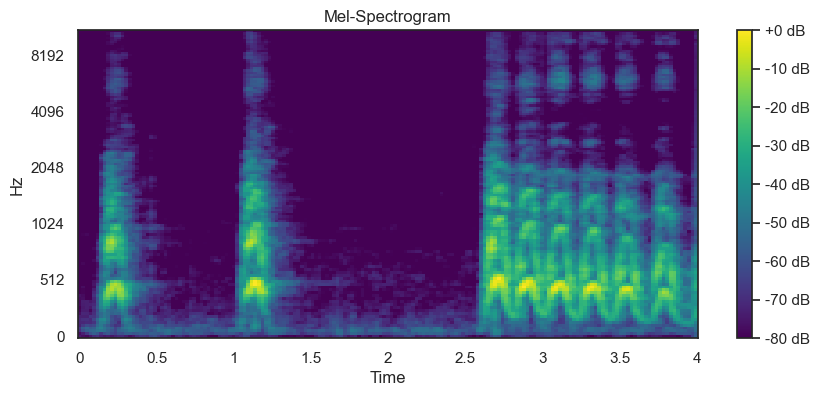

Trimmed Audio Duration: 3.74 seconds
Processed Audio Shape: (88200,)


In [25]:

# File path
file_path = "UrbanSound8K/audio/fold1/101415-3-0-2.wav"  # Example file path

# Function to load and analyze a WAV file
def analyze_audio(file_path, target_sr=22050, duration=4.0):
    """
    Load, analyze, and preprocess a single WAV file.
    Args:
        file_path (str): Path to the WAV file.
        target_sr (int): Target sampling rate.
        duration (float): Target duration in seconds.
    Returns:
        np.array: Preprocessed audio signal.
    """
    # Load the audio file
    y, sr = librosa.load(file_path, sr=target_sr)
    
    # Exploratory analysis
    print(f"Sampling Rate: {sr} Hz")
    print(f"Audio Duration: {librosa.get_duration(y=y, sr=sr):.2f} seconds")  # Fixed keyword arguments
    print(f"Audio Shape: {y.shape}")
    
    # Plot the waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y=y, sr=sr)
    plt.title("Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()
    
    # Plot the spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_dB, sr=sr, x_axis="time", y_axis="mel", cmap="viridis")
    plt.colorbar(format="%+2.0f dB")
    plt.title("Mel-Spectrogram")
    plt.show()
    
    # Preprocessing: Trim silence
    y_trimmed, _ = librosa.effects.trim(y, top_db=20)
    print(f"Trimmed Audio Duration: {librosa.get_duration(y=y_trimmed, sr=sr):.2f} seconds")
    
    # Preprocessing: Pad or truncate to fixed length
    fixed_length = int(target_sr * duration)
    if len(y_trimmed) < fixed_length:
        y_processed = np.pad(y_trimmed, (0, fixed_length - len(y_trimmed)), mode="constant")
    else:
        y_processed = y_trimmed[:fixed_length]
    
    print(f"Processed Audio Shape: {y_processed.shape}")
    
    # Return processed audio
    return y_processed

# Process the file
processed_audio = analyze_audio(file_path)



data clenning

data preperation

1d vs 2d selection

first model

anallasis

rest of the archtetural design